# Práctica 0 - Miguel García López

### Ejercicio 1
* Leer la base de datos de Iris que hay en scikit-learn. Véase https://scikit-learn.org/stable/datasets/toy_dataset.html. El conjunto de datos de flor Iris, introducido por Ronald
Fisher en 1936, es clásico en aprendizaje automático.

In [2]:
import sklearn.datasets as skd
import matplotlib.pyplot as mt
import numpy as np

data = skd.load_iris()

* Obtener las características (datos de entrada X) y la clase (y).


In [3]:
x = data.data
y = data.target

* Quedarse con las caracteríticas primera y tercera. Recuérdese que en Python los índices comienzan en 0.

* Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color. Más concretamente, el resultado debe ser el que se muestra en la Figura 1. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información por terminal.

* Fig 1:

![](https://drive.google.com/uc?export=view&id=1agIihlyWav2Zg9Z_rY3nB3M1WIRjIW23)

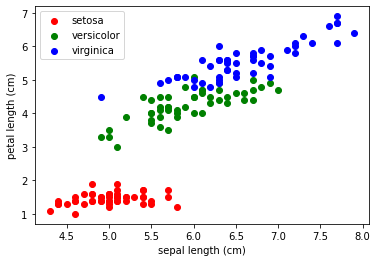

In [4]:
# Queremos la primera y la tercera característica, por ello los índices son 0 y 2
mt.scatter(x[:int(len(x)/3),0], x[:int(len(x)/3),2], c='red', label='setosa')
mt.scatter(x[int(len(x)/3):int(2*len(x)/3),0], x[int(len(x)/3):int(2*len(x)/3),2], c='green', label='versicolor')
mt.scatter(x[int(2*len(x)/3):,0], x[int(2*len(x)/3):,2], c='blue', label='virginica')

mt.xlabel("sepal length (cm)")
mt.ylabel("petal length (cm)")
mt.legend()
mt.show()

### Ejercicio 2
* Separar en training (80 % de los datos) y test (20 %) aleatoriamente, conservando la proporción de elementos en cada clase tanto en training como en test. Con esto se pretende
evitar que haya clases infra-representadas en entrenamiento o test. Con “aleatoriamente”
nos referimos a que no sería válido escoger como conjunto de entrenamiento el 80 % inicial de ejemplos de cada clase y como conjunto de test el 20 % final. Es decir, los ejemplos deben desordenarse con respecto al orden original. En la implementación de este ejercicio no se puede recurrir a funciones como train test split de scikit-learn o similares.

* Se debe imprimir por terminal el número resultante de ejemplos de cada clase, tanto
en entrenamiento como en test, así como las clases de cada uno de los ejemplos de
entrenamiento y test. En la Figura 2 se muestra el tipo de salida que se espera obtener.

* Fig 2:

![](https://drive.google.com/uc?export=view&id=1a8CEOWnJlRT_Hwrgv0WpmnVFLl8RzV0o)

In [5]:
# Creamos indices aleatorios entre 0 y len(x) (150), de esta forma accederemos
# de forma aleatoria a los datos.
indices = np.arange(0, len(x))
np.random.shuffle(indices)

x_aux = x[indices]
y_aux = y[indices]

tam_80_porct = int(len(x) / 3 * 0.8) # 80% de cada clase, no se puede superar este limite
cont_seto, cont_ver, cont_vir = 0, 0, 0
training_list, test_list, index_list = [], [], []

for i in indices:
    if y_aux[i] == 0 and cont_seto < tam_80_porct: # si es de una clase y no hemos llegado al limite la aceptamos
      training_list.append(i)
      cont_seto += 1
      index_list.append(i) # añadimos la posicion a una lista auxiliar
    elif y_aux[i] == 1 and cont_ver < tam_80_porct:
      training_list.append(i)
      cont_ver += 1
      index_list.append(i)
    elif y_aux[i] == 2 and cont_vir < tam_80_porct:
      training_list.append(i)
      cont_vir += 1
      index_list.append(i)

# Añadimos las posiciones restantes a la lista de test borrando las ya visitadas (80%)
test_list = np.delete(indices, index_list)

print("--- Clase setosa ---")
print("Ejemplos train: {}".format(cont_seto))
print("Ejemplos test: {}".format(cont_seto - len(test_list)))
print("--- Clase versicolor ---")
print("Ejemplos train: {}".format(cont_ver))
print("Ejemplos test: {}".format(cont_ver - len(test_list)))
print("--- Clase virginica ---")
print("Ejemplos train: {}".format(cont_vir))
print("Ejemplos test: {}".format(cont_vir - len(test_list)))
print("Clase de los ejemplos de entrenamiento:\n {}".format(y[training_list]))
print("Clase de los ejemplos de entrenamiento:\n {}".format(y[test_list]))

--- Clase setosa ---
Ejemplos train: 40
Ejemplos test: 10
--- Clase versicolor ---
Ejemplos train: 40
Ejemplos test: 10
--- Clase virginica ---
Ejemplos train: 40
Ejemplos test: 10
Clase de los ejemplos de entrenamiento:
 [1 2 0 2 2 0 0 1 0 1 2 2 0 2 0 2 0 1 2 0 2 0 1 2 0 1 1 0 0 2 0 2 1 1 1 2 1
 0 1 2 0 1 1 1 0 2 0 1 0 2 1 0 0 2 0 2 2 0 0 1 1 2 2 0 0 1 2 0 1 1 0 2 1 2
 1 2 0 0 2 2 2 2 1 0 0 0 2 0 0 1 1 2 0 2 1 1 0 1 0 1 2 0 1 1 1 0 0 1 2 2 1
 2 0 1 2 1 0 0 1 2]
Clase de los ejemplos de entrenamiento:
 [0 2 1 2 1 0 0 2 1 2 1 2 0 2 0 2 0 1 1 1 0 0 0 0 1 2 2 1 2 1]


### Ejercicio 3
* Obtener 100 valores equiespaciados entre 0 y 4π

In [6]:
# Utilizamos linspace ya que necesitamos numeros flotantes
valores = np.linspace(0, 4 * np.pi, 100)
print(valores)

[ 0.          0.12693304  0.25386607  0.38079911  0.50773215  0.63466518
  0.76159822  0.88853126  1.01546429  1.14239733  1.26933037  1.3962634
  1.52319644  1.65012947  1.77706251  1.90399555  2.03092858  2.15786162
  2.28479466  2.41172769  2.53866073  2.66559377  2.7925268   2.91945984
  3.04639288  3.17332591  3.30025895  3.42719199  3.55412502  3.68105806
  3.8079911   3.93492413  4.06185717  4.1887902   4.31572324  4.44265628
  4.56958931  4.69652235  4.82345539  4.95038842  5.07732146  5.2042545
  5.33118753  5.45812057  5.58505361  5.71198664  5.83891968  5.96585272
  6.09278575  6.21971879  6.34665183  6.47358486  6.6005179   6.72745093
  6.85438397  6.98131701  7.10825004  7.23518308  7.36211612  7.48904915
  7.61598219  7.74291523  7.86984826  7.9967813   8.12371434  8.25064737
  8.37758041  8.50451345  8.63144648  8.75837952  8.88531256  9.01224559
  9.13917863  9.26611167  9.3930447   9.51997774  9.64691077  9.77384381
  9.90077685 10.02770988 10.15464292 10.28157596 10.4

* Obtener el valor de $10^{-5} · sinh(x)$, $cos(x)$ y $tanh(2 · sin(x) − 4 · cos(x))$ para los 100 valores anteriormente calculados.

In [7]:
ec_1 = 10 ** (-5) * np.sinh(valores)
ec_2 = np.cos(valores)
ec_3 = np.tanh(2 * np.sin(valores) - 4 * np.cos(valores))

* Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en verde, negro y rojo) e incluir la leyenda correspondiente. Más concretamente, el resultado debe ser el que se muestra en la Figura 3. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra informaci ́on por terminal.

* Fig 3:

![](https://drive.google.com/uc?export=view&id=1CQPvTrf9oTUs4_w5pHo4l5b8ITl9PqmK)

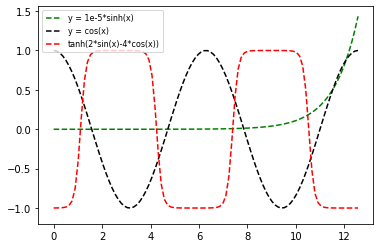

In [8]:
y1 = ec_1.copy()
y2 = ec_2.copy()
y3 = ec_3.copy()

fig, ax = mt.subplots()
ax.plot(valores, y1, 'k--', color = 'green', label = 'y = 1e-5*sinh(x)')
ax.plot(valores, y2, 'k--', label = 'y = cos(x)')
ax.plot(valores, y3, 'k--', color = 'red', label = 'tanh(2*sin(x)-4*cos(x))')
ax.set_ylim((-1.2, 1.56))

legend = ax.legend(loc='upper left', fontsize=8)

mt.show()

### Ejercicio 3
* Mostrar dos funciones 3D dentro de la misma figura. Las funciones a mostrar son las siguientes:
   * $f(x,y) = 1 - |x + y| - |y - x|$
   * $f(x,y) = x · y · e^{(-x^2 - y^2)}$

* Como se indicaba, ambas funciones deben mostrarse dentro de la misma figura/ventana como surface plots. Más concretamente, el resultado debe ser exactamente el que se muestra en la Figura 4 (tanto a nivel de título de las gráficas, como de rango de valores en los ejes y colores empleados). Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información por terminal. El siguiente enlace puede servir de ayuda y referencia a la hora de realizar este ejercicio: https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html. De cara a mostrar ecuaciones matemáticas en figuras de Matplotlib usando LaTeX la siguiente referencia puede ser de utilidad: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html.

* Fig 4:

![](https://drive.google.com/uc?export=view&id=1w3kgoCgK4s5aQRw7Khrc_B6RbDL0ferq)


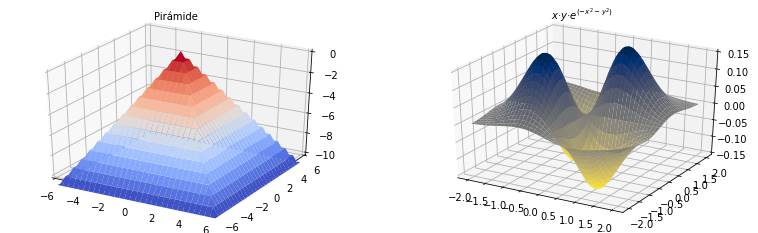

In [9]:
from matplotlib import cm

#Función 1
a = np.arange(-6, 6.04, 0.4)
b = np.arange(-6, 6.04, 0.4)
a, b = np.meshgrid(a, b)
ec1_3D = 1 - np.abs(a + b) - np.abs(b - a)

fig = mt.figure(figsize=mt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Pirámide', fontsize=10)
ax.set_xlim3d(-6,6)
ax.set_ylim3d(-6,6)
ax.set_zlim3d(-10,0)
ax.plot_surface(a, b, ec1_3D, cmap=cm.coolwarm)

# Función 2
c = np.arange(-2, 2.05, 0.05)
d = np.arange(-2, 2.05, 0.05)
c, d = np.meshgrid(c, d)
ec2_3D = c * d * np.exp(-c ** 2 -d ** 2)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(r'$x · y · e^{(-x^2 - y^2)}$', fontsize=10)
ax.set_zlim3d(-0.15,0.15)
ax.plot_surface(c, d, ec2_3D, cmap=cm.cividis_r)

mt.show()